In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

In [85]:
## Create the model class that inherits nn.Module
class Model(nn.Module):
    
    #Input layer( 4 fetures of the flower) 
    #--> Hidden layer1 (number of neurons)
    #--> Hidden layer 2 to n (number of neurons)
    #--> output 3 classes of flowers
    
    def __init__(self, in_features=4, h1=8, h2=4, out_features=3):
        super().__init__() # instantiate our nn. module
        self.fc1= nn.Linear(in_features,h1) 
        self.fc2= nn.Linear(h1,h2)
        self.out= nn.Linear(h2,out_features)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        
        return x
        
    
    

In [74]:
# Pick a manual
torch.manual_seed(41)
# Create an instance of model
model= Model()

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [107]:
url=''
my_df= pd.read_csv('/kaggle/input/iris/Iris.csv')

my_df.drop('Id',axis=1,inplace=True)
my_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
# label encoded mannually
my_df['Species']=my_df['Species'].replace('Iris-setosa',0.0)
my_df['Species']= my_df['Species'].replace('Iris-versicolor',1.0)
my_df['Species']= my_df['Species'].replace('Iris-virginica',2.0)

/tmp/ipykernel_34/413116516.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['Species']= my_df['Species'].replace('Iris-virginica',2.0)


In [109]:
my_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [110]:
# Train test and split
X= my_df.drop('Species',axis=1)
y= my_df['Species']

In [111]:
X=X.values
y= y.values

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
# Train test Split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=41)


In [114]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [115]:
# convert X features to tensors
#Convert y labels to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
print(f'X_train shape: {X_train.shape}')  # Should be (96, 4) for 80% training data
print(f'y_train shape: {y_train.shape}')  # Should be (96,)
print(f'X_test shape: {X_test.shape}')    # Should be (24, 4) for 20% test data
print(f'y_test shape: {y_test.shape}')

X_train shape: torch.Size([120, 4])
y_train shape: torch.Size([120])
X_test shape: torch.Size([30, 4])
y_test shape: torch.Size([30])


In [116]:
# Set the criterion to measure the error
# How far the predictions are from the data

criterion= nn.CrossEntropyLoss()

# Choose an optimiser (Adam) set learning rate
# if the loss doesnt reduce after a no of epochs we lower our learning rate
# model parameter passes the layers that we created before one after teh other to optimize
# and learn
optimizer= torch.optim.Adam(model.parameters(),lr=0.01)

In [117]:
# all layers and outputs, bais here
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=3, bias=True)
)>

In [119]:
#Train our model
# epoch 1 -> run through all the train data in our network
# epoch 2 ->""" """"""""""""""" 2nd time """""""""""""""""
epoch= 100
losses=[]
for i in range (epoch):
    # Go forward and get a prediction
    # model.forward uses forward propogation
    y_pred= model.forward(X_train)
    # Measure the loss/ error gona be high first
    loss= criterion(y_pred,y_train)#predicted value vs y_train value
    # keep track of our losses
    losses.append(loss.detach().numpy())
    #print every 10 epochs
    if i%10==0:
        print(f"Epoch: {i} and loss: {loss}")
    # follow back propogation to reduce loss
    # by going back finetuning the weights and reducing loss 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.088448405265808
Epoch: 10 and loss: 0.9830717444419861
Epoch: 20 and loss: 0.7722486853599548
Epoch: 30 and loss: 0.5205232501029968
Epoch: 40 and loss: 0.37410280108451843
Epoch: 50 and loss: 0.2744363844394684
Epoch: 60 and loss: 0.1912023425102234
Epoch: 70 and loss: 0.1320282518863678
Epoch: 80 and loss: 0.09574410319328308
Epoch: 90 and loss: 0.07420340180397034


Text(0.5, 0, 'epoch')

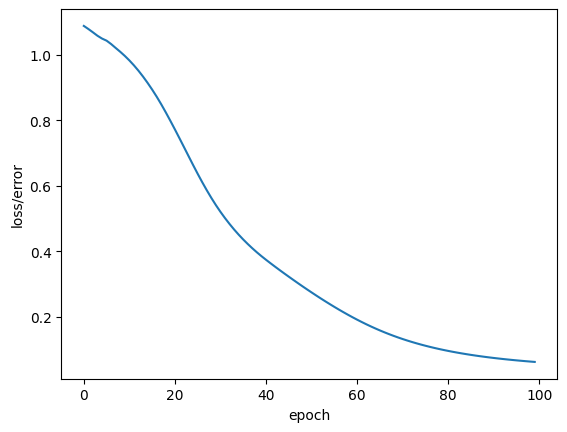

In [121]:
# plotting the loss reducing graph
# if the graph does not show flttened endnear 100 we shd
# either increase epoch or reduce learning rate
plt.plot(range(epoch),losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [122]:
# evaluate Model on test data set (validate model on test set)
with torch.no_grad(): # basically turn off back propogation we dont need it while evaluatio
    y_eval= model.forward(X_test) # forward propogation for test data, y for evaluation is predicted
    loss = criterion(y_eval,y_test) # Find the loss or score

In [123]:
loss

tensor(0.1365)

In [153]:
# what type of flower our network is predicting
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        # what type of flower our network is predicting
        # also to match it with the predicted and actutal
        print(f'{i+1}.) {str(y_val)} \n\t\t\t\t\t\t\t Actual: {y_test[i]} \t Predicted: {y_val.argmax().item()}')
        #Correct or not chaecking teh max predicted value wit test val
        if y_val.argmax().item()==y_test[i]:
            correct+=1
print(f'We got {correct} correct')

1.) tensor([-0.2228,  8.8793, 10.8319]) 
							 Actual: 2 	 Predicted: 2
2.) tensor([-1.6728,  9.8973, 14.9946]) 
							 Actual: 2 	 Predicted: 2
3.) tensor([-1.1803, 11.3229, 15.9001]) 
							 Actual: 2 	 Predicted: 2
4.) tensor([2.1565, 8.7165, 5.9755]) 
							 Actual: 1 	 Predicted: 1
5.) tensor([-0.5994, 10.1923, 13.2862]) 
							 Actual: 2 	 Predicted: 2
6.) tensor([3.5240, 8.4303, 2.9322]) 
							 Actual: 1 	 Predicted: 1
7.) tensor([ 0.3933,  9.3257, 10.2142]) 
							 Actual: 2 	 Predicted: 2
8.) tensor([2.3033, 8.7481, 5.7306]) 
							 Actual: 1 	 Predicted: 1
9.) tensor([-0.0938,  9.7531, 11.7243]) 
							 Actual: 2 	 Predicted: 2
10.) tensor([-1.7395, 10.4898, 15.9005]) 
							 Actual: 2 	 Predicted: 2
11.) tensor([0.5064, 9.1482, 9.7611]) 
							 Actual: 2 	 Predicted: 2
12.) tensor([ 11.0933,   6.1344, -14.8452]) 
							 Actual: 0 	 Predicted: 0
13.) tensor([  9.9649,   5.5698, -13.3824]) 
							 Actual: 0 	 Predicted: 0
14.) tensor([3.6217, 7.0303, 0.9084]) 
	